In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
dataset = pd.read_csv('/content/sample_data/sonar.csv')

In [4]:
dataset.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050

In [7]:
dataset.select_dtypes(include=np.object)

,R
0,R
1,R
2,R
3,R
4,R
...,...
202,M
203,M
204,M
205,M


In [8]:
dataset.value_counts()

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  0.1609  0.1582  0.2238  0.0645  0.0660  0.2273  0.3100  0.2999  0.5078  0.4797  0.5783  0.5071  0.4328  0.5550  0.6711  0.6415  0.7104  0.8080  0.6791  0.3857  0.1307  0.2604  0.5121  0.7547  0.8537  0.8507  0.6692  0.6097  0.4943  0.2744  0.0510  0.2834  0.2825  0.4256  0.2641  0.1386  0.1051  0.1343  0.0383  0.0324  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090  0.0032  R
0.1371  0.1226  0.1385  0.1484  0.1776  0.1428  0.1773  0.2161  0.1630  0.2067  0.4257  0.5484  0.7131  0.7003  0.6777  0.7939  0.9382  0.8925  0.9146  0.7832  0.7960  0.7983  0.7716  0.6615  0.4860  0.5572  0.4697  0.5640  0.4517  0.3369  0.2684  0.2339  0.3052  0.3016  0.2753  0.1041  0.1757  0.3156  0.3603  0.2736  0.1301  0.2458  0.3404  0.1753  0.0679  0.1062  0.0643  0.0532  0.0531  0.0272  0.0171  0.0118  0.0129  0.0344  0.0065  0.0067  0.0022  0.0079  0.0146  0.0051  M    1
0.0164  0.0627  0.0738  0.0608 

In [10]:
dataset.isna().count()

0.0200    207
0.0371    207
0.0428    207
0.0207    207
0.0954    207
         ... 
0.0180    207
0.0084    207
0.0090    207
0.0032    207
R         207
Length: 61, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a22eb4c90>,
      dtype=object)

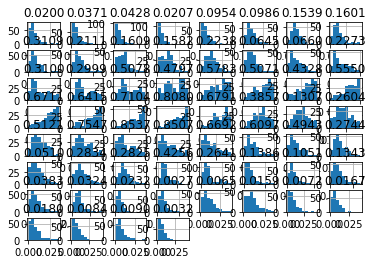

In [14]:
dataset.hist(sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a1cbcae90>,
      dtype=object)

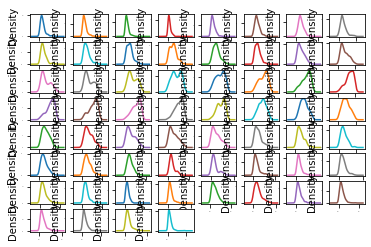

In [16]:
# Density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, sharey=False, legend=False,
            fontsize=1)

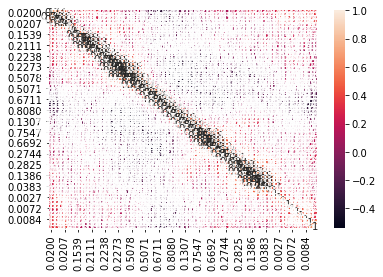

In [21]:
sb.heatmap(dataset.corr(), annot=True)

In [22]:
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [25]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

In [28]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=2)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.769853 (0.106086)
LDA: 0.701838 (0.086338)
KNN: 0.756618 (0.111644)
SVM: 0.768750 (0.106420)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


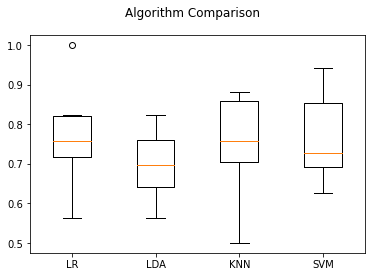

In [35]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10, random_state=2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.831250 using {'C': 1.5, 'kernel': 'rbf'}


In [40]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=2)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 0.758088 (0.079819)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 0.770956 (0.123379)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.788235 (0.071747)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 0.806250 (0.070451)
